__**Table of Contents**__
====

>#### [4/1/2019 - 4/5/2019](#4012019)
&emsp;   Diagnostic plots to evaluate efficacy of cuts.

<a id='4012019'></a>

4/1/2019 - 4/5/2019
====

>### David recommended making Hess diagrams in these color-color spaces for each individual cut separately:
 - g-z vs. g-i
 - g-DDO51 vs. g-i
 - total proper motion vs. g
 
>### These will have scatter plots of stars removed by the cut.

In [69]:
###Get color-color 2D histogram stats for g-z vs. g-i
# Import modules
import numpy as np
from scipy import stats
import basic

#Import list of exposures/CCDs
night = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\exposures.fits')

#Create blank array with 200*200 bins
retm = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\retarray.npy')*0

#Define bin edges
#Loading data from each night
z = Table.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2011\g11d302\pcat\g11d302.010.h5", path="1")
#Load data using basic.py
t = basic.Catalog.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2011\g11d302\pcat\g11d302.010.h5", chips=1)

#Correct for extinction
g_extinct = t.extinction_correct('g')
i_extinct = t.extinction_correct('i')
z_extinct = t.extinction_correct('z')

#Remove nans
ind = np.where((~np.isnan(g_extinct))&(~np.isnan(i_extinct))&(~np.isnan(z_extinct)))
g_extinct = g_extinct[ind]
i_extinct = i_extinct[ind]
z_extinct = z_extinct[ind]

#Numpy arrays with photometry
g = np.array(g_extinct)
i = np.array(i_extinct)
z = np.array(z_extinct)

#Colors
y = g - z
x = g - i

ret,xedge,yedge,bin = stats.binned_statistic_2d(x,y,None,'count',bins=200)

#Look at approximately 333 exposures
for i in range(600):
    #Load data from each exposure/CCD using basic.py
    chip = int(night['ccdn'][i])
    t = basic.Catalog.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(night['night'][i][1:3],night['night'][i][0:7],night['night'][i][0:14]), chips=chip)
     
    #Correct for extinction
    g_extinct = t.extinction_correct('g')
    i_extinct = t.extinction_correct('i')
    z_extinct = t.extinction_correct('z')

    #Remove nans
    ind = np.where((~np.isnan(g_extinct))&(~np.isnan(i_extinct))&(~np.isnan(z_extinct)))
    g_extinct = g_extinct[ind]
    i_extinct = i_extinct[ind]
    z_extinct = z_extinct[ind]

    #Numpy arrays with photometry
    g = np.array(g_extinct)
    i = np.array(i_extinct)
    z = np.array(z_extinct)

    #Colors
    y = g - z
    x = g - i

    ret,xed,yed,bin = stats.binned_statistic_2d(x,y,None,'count',bins=[xedge,yedge])
    
    retm = np.add(ret,retm)

np.save(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gz_counts.npy',retm)
np.save(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gz_xedge.npy',xedge)
np.save(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gz_yedge.npy',yedge)

<IPython.core.display.Javascript object>


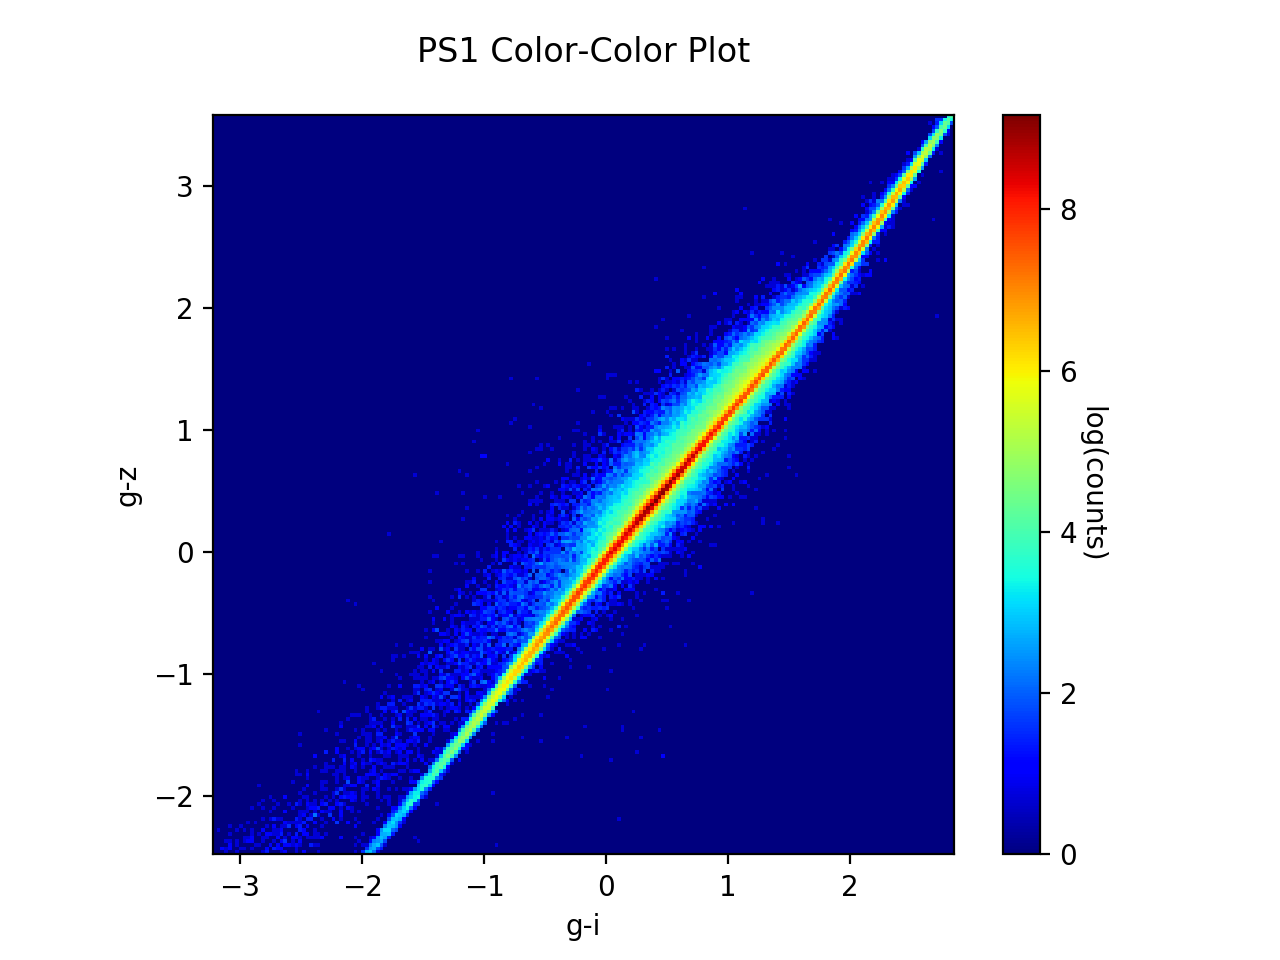

In [70]:
#Import modules
import matplotlib.pyplot as plt
%matplotlib nbagg

#Load bin edges
xedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gz_xedge.npy')
yedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gz_yedge.npy')

retm[retm==0]=1
ax = plt.imshow(np.log(retm.T),extent=[xedge.min(),xedge.max(),yedge.min(),yedge.max()],origin='lower',cmap='jet')
plt.xlabel('g-i')
plt.ylabel('g-z')
plt.title('PS1 Color-Color Plot', y=1.05)
cbar = plt.colorbar()
cbar.set_label('log(counts)', rotation=270, labelpad=10)

plt.show()

In [49]:
###Get 2D histogram stats for total proper motion vs. g
# Import modules
import numpy as np
from scipy import stats
import basic

#Import list of exposures/CCDs
night = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\exposures.fits')

#Create blank array with 200*200 bins
retm2 = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\retarray.npy')*0

#Define bin edges
#Loading data from each night
z = Table.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2011\g11d302\pcat\g11d302.010.h5", path="1")
#Load data using basic.py
t = basic.Catalog.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2011\g11d302\pcat\g11d302.010.h5", chips=1)

#Correct for extinction
g_extinct = t.extinction_correct('g')

#Remove nans
ind = np.where((~np.isnan(g_extinct))&(~np.isnan(z['pmra']))&(~np.isnan(z['pmde'])))
g_extinct = g_extinct[ind]
pmra = z['pmra'][ind]
pmde = z['pmde'][ind]

#Total proper motion
tpm = np.sqrt(pmra**2+pmde**2)

#Numpy arrays with photometry and total proper motions
x = np.array(g_extinct)
y = np.array(tpm)

ret,xedge,yedge,bin = stats.binned_statistic_2d(x,y,None,'count',bins=200)
    
#Look at 100 exposures
for i in range(600):
    #Loading data from each night
    z = Table.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(night['night'][i][1:3],night['night'][i][0:7],night['night'][i][0:14]), path="{0}".format(night['ccdn'][i]))

    #Load data using basic.py
    chip = int(night['ccdn'][i])
    t = basic.Catalog.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(night['night'][i][1:3],night['night'][i][0:7],night['night'][i][0:14]), chips=chip)
    
    #Correct for extinction
    g_extinct = t.extinction_correct('g')

    #Remove nans
    ind = np.where((~np.isnan(g_extinct))&(~np.isnan(z['pmra']))&(~np.isnan(z['pmde'])))
    g_extinct = g_extinct[ind]
    pmra = z['pmra'][ind]
    pmde = z['pmde'][ind]
    
    #Total proper motion
    tpm = np.sqrt(pmra**2+pmde**2)

    #Numpy arrays with photometry and total proper motions
    x = np.array(g_extinct)
    y = np.array(tpm)
    
    ret,xed,yed,bin = stats.binned_statistic_2d(x,y,None,'count',bins=[xedge,yedge])
    
    retm2 = np.add(ret,retm2)

np.save(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\g_tpm_counts.npy',retm2)
np.save(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\g_tpm_xedge.npy',xedge)
np.save(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\g_tpm_yedge.npy',yedge)

<IPython.core.display.Javascript object>


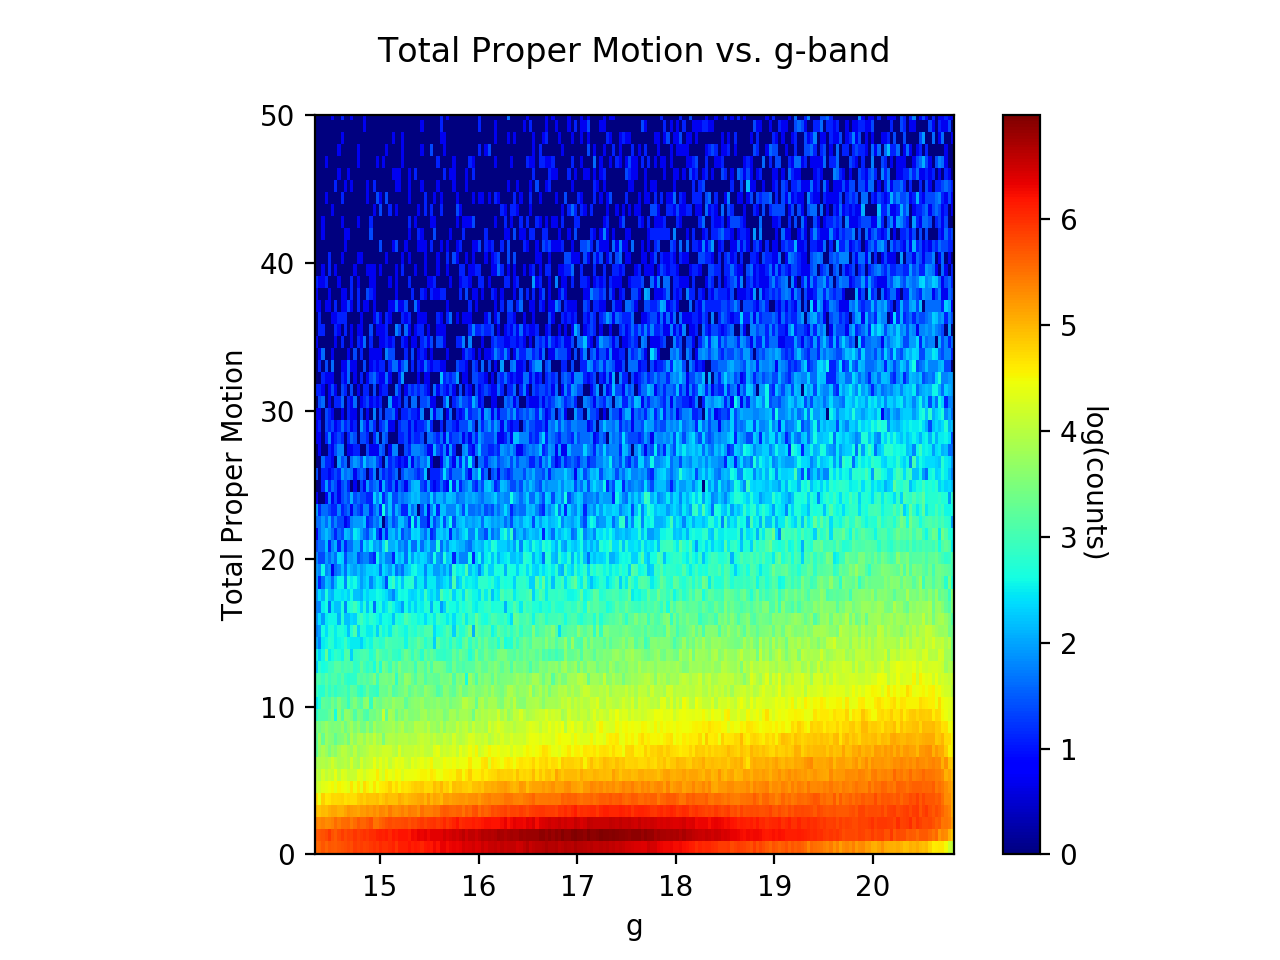

In [63]:
#Import modules
import matplotlib.pyplot as plt
%matplotlib nbagg

#Load bin edges
xedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\g_tpm_xedge.npy')
yedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\g_tpm_yedge.npy')

retm2[retm2==0]=1 

ax = plt.imshow(np.log(retm2).T,extent=[xedge.min(),xedge.max(),yedge.min(),yedge.max()],origin='lower',cmap='jet',aspect=0.15)
plt.xlabel('g')
plt.ylabel('Total Proper Motion')
plt.ylim(0,50)
plt.title('Total Proper Motion vs. g-band', y=1.05)
cbar = plt.colorbar()
cbar.set_label('log(counts)', rotation=270, labelpad=10)


plt.show()

In [39]:
###Get color-color 2D histogram stats for g-ddo51 vs. g-i
# Import modules
import numpy as np
from scipy import stats
import basic
#import random

#Import list of exposures/CCDs
night = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\exposures.fits')

#Create blank array with 200*200 bins
retm3 = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\retarray.npy')*0

xedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\xedgegigd200b.npy')
yedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\yedgegigd200b.npy')

#Look at approximately ## exposures
for i in range(0,100):   ###LOADING ALL CCDS AT ONCE
    #i = random.randint(0,7000)
    #Load data using basic.py
    chip = int(night['ccdn'][i])
    t = basic.Catalog.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(
        night['night'][i][1:3],night['night'][i][0:7],night['night'][i][0:14]))
    
    #Correct for extinction
    g_extinct = t.extinction_correct('g')
    i_extinct = t.extinction_correct('i')
    d_extinct = t.extinction_correct('ddo51')

    #Remove nans
    ind = np.where((~np.isnan(g_extinct))&(~np.isnan(i_extinct))&(~np.isnan(d_extinct)))
    g_extinct = g_extinct[ind]
    i_extinct = i_extinct[ind]
    d_extinct = d_extinct[ind]

    #Numpy arrays with photometry
    g = np.array(g_extinct)
    i = np.array(i_extinct)
    d = np.array(d_extinct)

    #Colors
    y = g - d
    x = g - i

    ret,xed,yed,bin = stats.binned_statistic_2d(x,y,None,'count',bins=[xedge,yedge])
    
    retm3 = np.add(ret,retm3)

np.save(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gd_counts.npy',retm3)
np.save(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gd_xedge.npy',xedge)
np.save(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gd_yedge.npy',yedge)

<IPython.core.display.Javascript object>


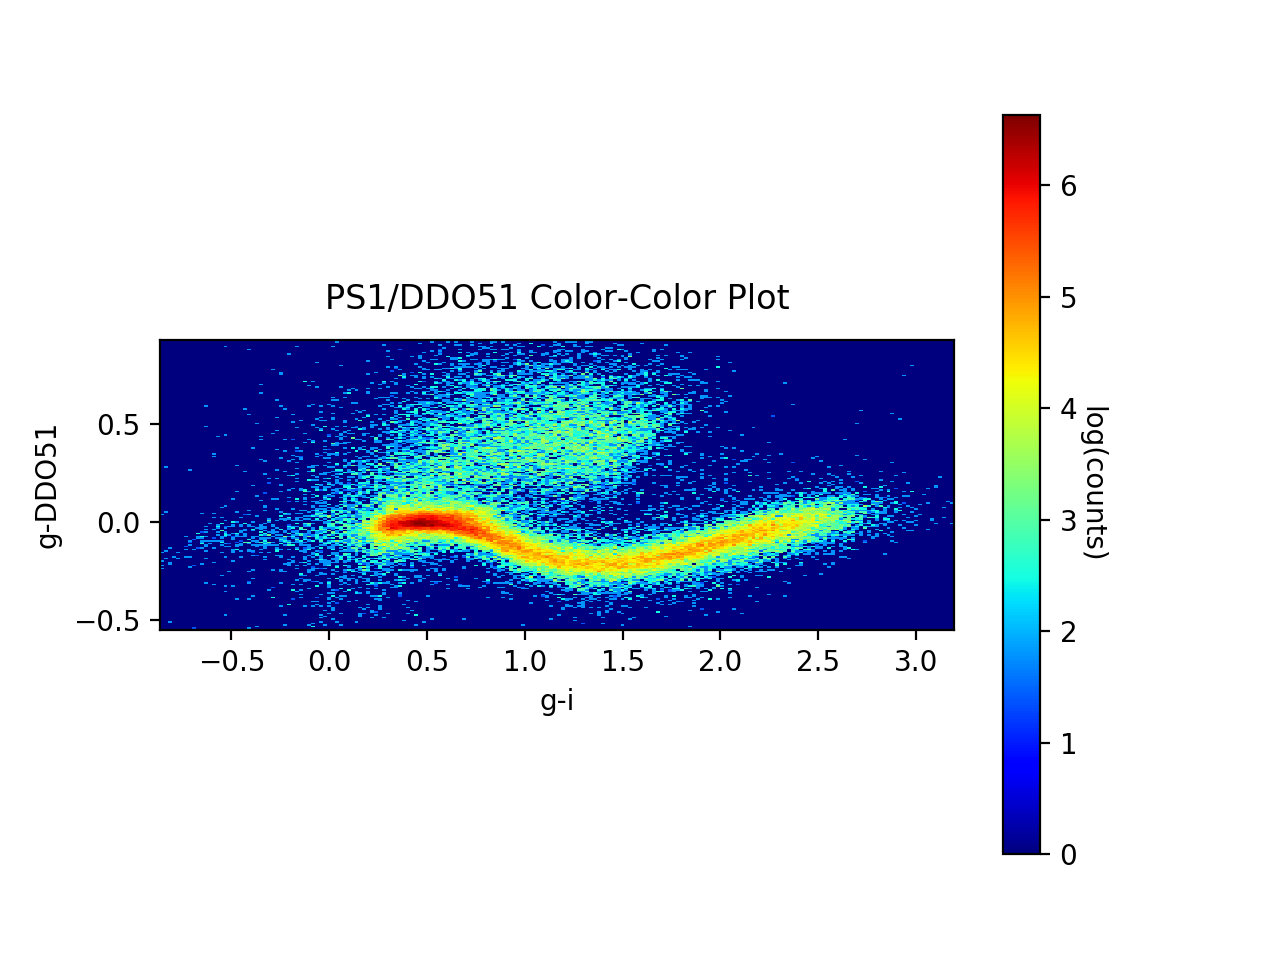

In [66]:
#Import modules
import matplotlib.pyplot as plt
%matplotlib nbagg

#Load bin edges
xedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gd_xedge.npy')
yedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gd_yedge.npy')

retm3[retm3==0]=1
ax = plt.imshow(np.log(retm3.T),extent=[xedge.min(),xedge.max(),yedge.min(),yedge.max()],origin='lower',cmap='jet')
plt.xlabel('g-i')
plt.ylabel('g-DDO51')
#plt.ylim(-0.6,0.9)
#plt.xlim(-1,3.3)
plt.title('PS1/DDO51 Color-Color Plot', y=1.05)
cbar = plt.colorbar()
cbar.set_label('log(counts)', rotation=270, labelpad=10)

plt.show()

<IPython.core.display.Javascript object>


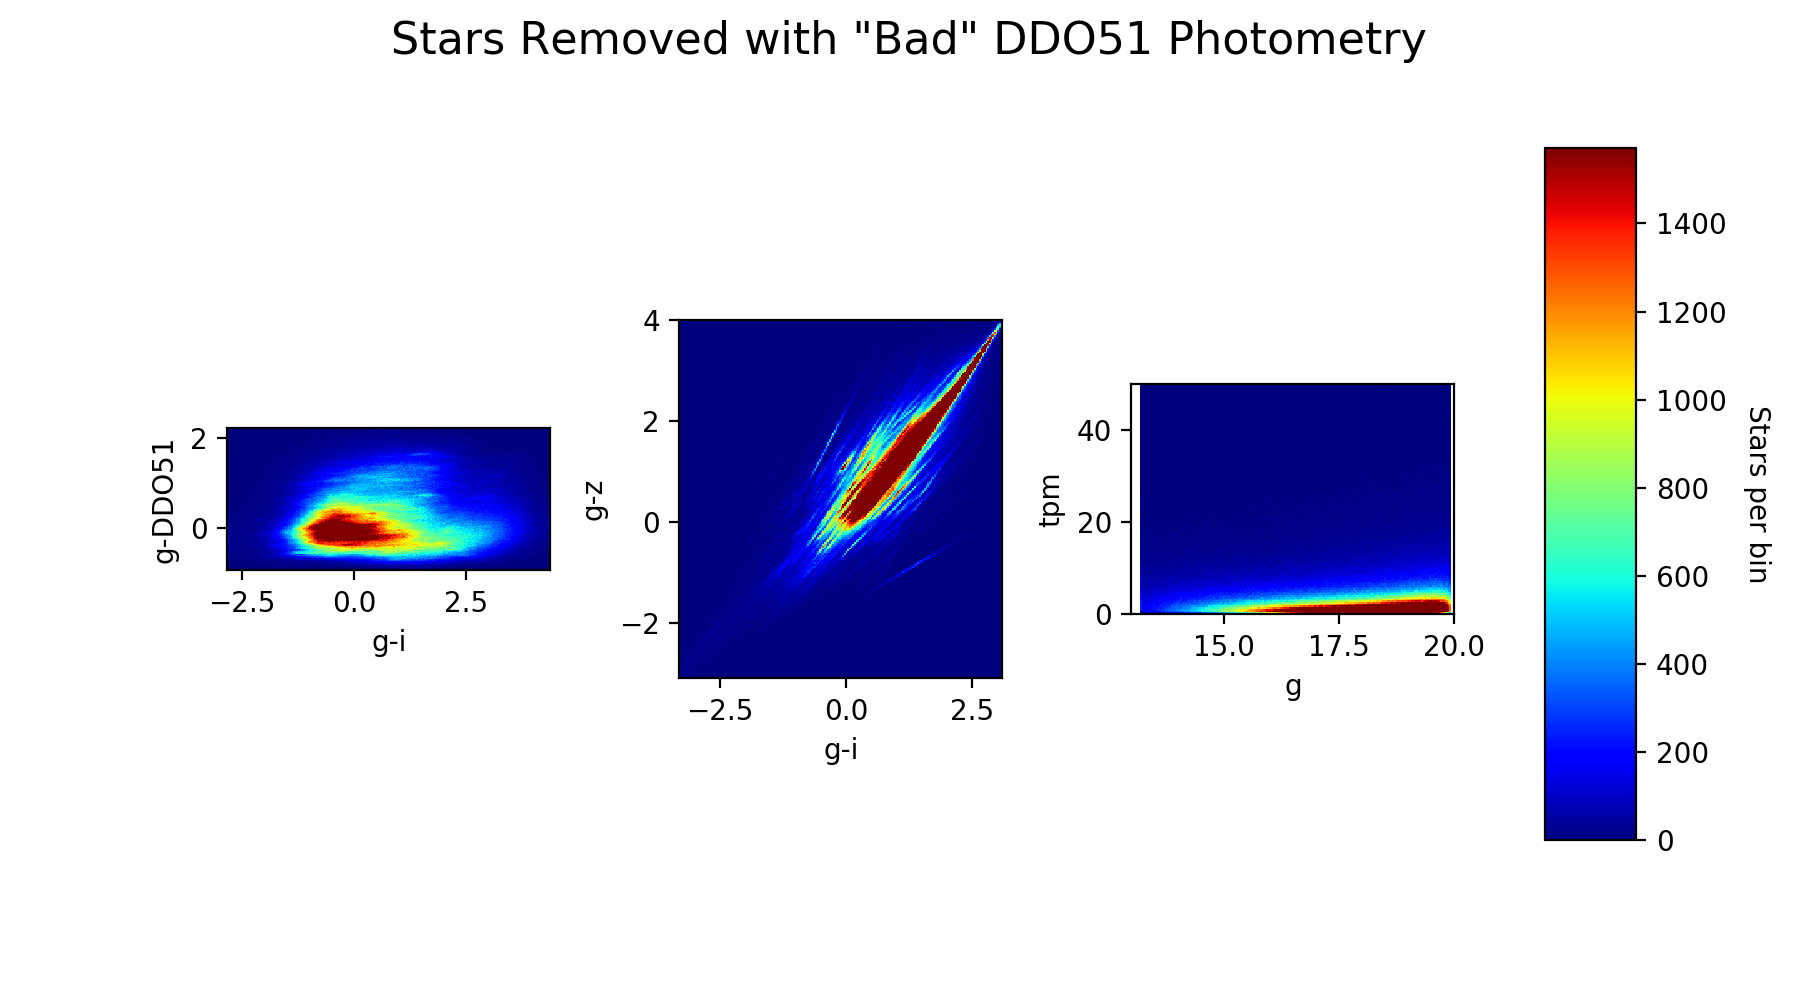

C:\Users\shebe\Anaconda3\lib\site-packages\astropy\table\column.py:929: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, oper)(other)
C:\Users\shebe\Anaconda3\lib\site-packages\astropy\table\column.py:929: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, oper)(other)


In [48]:
###CUT: (z['ddo51']<50)&(z['ddo51']>1)
#Import modules
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack
import basic
%matplotlib nbagg

#Import list of exposures/CCDs
night = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\exposures.fits')

#Make subplots
fig, axes = plt.subplots(nrows=1, ncols=3)

#Subplot 1: g-DDO51 vs. g-i
#Pre-cut histogram
xedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gd_xedge.npy')
yedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gd_yedge.npy')
retm3 = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gd_counts.npy')
plt.subplot(1, 3, 1)
plt.imshow(retm3.T,extent=[xedge.min(),xedge.max(),yedge.min(),yedge.max()],origin='lower',cmap='jet',vmin=0, vmax=1000)
plt.ylabel('g-DDO51')
plt.xlabel('g-i')

#Post-cut scatterplot

#Blank fits table
col1 = fits.Column(name='g', format='D05', array=np.zeros(len(z)))
col2 = fits.Column(name='i', format='D05', array=np.zeros(len(z)))
col3 = fits.Column(name='ddo51', format='D05', array=np.zeros(len(z)))
coldefs = fits.ColDefs([col1, col2,col3])
moff = fits.BinTableHDU.from_columns(coldefs)
temp = Table.read(moff)

for i in range(600):
    #Load data using basic.py
    chip = int(night['ccdn'][i])
    z = Table.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(night['night'][i][1:3],night['night'][i][0:7],night['night'][i][0:14]), path="{0}".format(chip))
    t = basic.Catalog.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(night['night'][i][1:3],night['night'][i][0:7],night['night'][i][0:14]), chips=chip)
    
    #Correct for extinction
    g_extinct = t.extinction_correct('g')
    i_extinct = t.extinction_correct('i')
    d_extinct = t.extinction_correct('ddo51')
    
    #CUT
    ind = np.where(((z['ddo51']>50)|(z['ddo51']<1)))
    z = z[ind]
    g_extinct = g_extinct[ind]
    i_extinct = i_extinct[ind]
    d_extinct = d_extinct[ind]

    #Remove nans
    ind = np.where((~np.isnan(g_extinct))&(~np.isnan(i_extinct))&(~np.isnan(d_extinct)))
    g_extinct = g_extinct[ind]
    i_extinct = i_extinct[ind]
    d_extinct = d_extinct[ind]
    z = z[ind]

    #Numpy arrays with de-reddened photometry
    g = np.array(g_extinct)
    i = np.array(i_extinct)
    d = np.array(d_extinct)
    
    #Temporary fits table to house photometry
    col1 = fits.Column(name='g', format='D05', array=np.zeros(len(z)))
    col2 = fits.Column(name='i', format='D05', array=np.zeros(len(z)))
    col3 = fits.Column(name='ddo51', format='D05', array=np.zeros(len(z)))
    coldefs = fits.ColDefs([col1, col2,col3])
    moff = fits.BinTableHDU.from_columns(coldefs)
    dat = Table.read(moff)
    
    #Insert reddening corrected photometry
    dat['g'] = g
    dat['i'] = i
    dat['ddo51'] = d

    temp = vstack([temp,dat])

x = temp['g'] - temp['i']
y = temp['g'] - temp['ddo51']
plt.scatter(x,y,s=4,c='m',marker='*')

#Subplot 2: g-z vs. g-i
#Pre-cut histogram
xedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gz_xedge.npy')
yedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gz_yedge.npy')
retm1 = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gz_counts.npy')
plt.subplot(1, 3, 2)
plt.imshow(retm1.T,extent=[xedge.min(),xedge.max(),yedge.min(),yedge.max()],origin='lower',cmap='jet',vmin=0, vmax=1000)
plt.ylabel('g-z')
plt.xlabel('g-i')
plt.xlim(-3.3,3.1)
plt.ylim(-3.1,4)

#Post-cut scatterplot

#Blank fits table
col1 = fits.Column(name='g', format='D05', array=np.array([]))
col2 = fits.Column(name='i', format='D05', array=np.array([]))
col3 = fits.Column(name='z', format='D05', array=np.array([]))
coldefs = fits.ColDefs([col1, col2,col3])
moff = fits.BinTableHDU.from_columns(coldefs)
temp = Table.read(moff)

for i in range(600):
    #Load data using basic.py
    chip = int(night['ccdn'][i])
    u = Table.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(night['night'][i][1:3],night['night'][i][0:7],night['night'][i][0:14]), path="{0}".format(chip))
    t = basic.Catalog.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(night['night'][i][1:3],night['night'][i][0:7],night['night'][i][0:14]), chips=chip)
    
    #Correct for extinction
    g_extinct = t.extinction_correct('g')
    i_extinct = t.extinction_correct('i')
    z_extinct = t.extinction_correct('z')
    
    #CUT
    ind = np.where(((u['ddo51']>50)|(u['ddo51']<1)))
    u = u[ind]
    g_extinct = g_extinct[ind]
    i_extinct = i_extinct[ind]
    z_extinct = z_extinct[ind]

    #Remove nans
    ind = np.where((~np.isnan(g_extinct))&(~np.isnan(i_extinct))&(~np.isnan(z_extinct)))
    g_extinct = g_extinct[ind]
    i_extinct = i_extinct[ind]
    z_extinct = z_extinct[ind]
    u = u[ind]

    #Numpy arrays with de-reddened photometry
    g = np.array(g_extinct)
    i = np.array(i_extinct)
    z = np.array(z_extinct)
    
    #Temporary fits table to house photometry
    col1 = fits.Column(name='g', format='D05', array=np.zeros(len(u)))
    col2 = fits.Column(name='i', format='D05', array=np.zeros(len(u)))
    col3 = fits.Column(name='z', format='D05', array=np.zeros(len(u)))
    coldefs = fits.ColDefs([col1, col2,col3])
    moff = fits.BinTableHDU.from_columns(coldefs)
    dat = Table.read(moff)
    
    #Insert reddening corrected photometry
    dat['g'] = g
    dat['i'] = i
    dat['z'] = z

    temp = vstack([temp,dat])

x = temp['g'] - temp['i']
y = temp['g'] - temp['z']
plt.scatter(x,y,s=4,c='m',marker='*')

#Subplot 2: tpm vs. g
#Pre-cut histogram
xedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\g_tpm_xedge.npy')
yedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\g_tpm_yedge.npy')
retm = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\g_tpm_counts.npy')
plt.subplot(1, 3, 3)
plt.imshow(retm.T,extent=[xedge.min(),xedge.max(),yedge.min(),yedge.max()],origin='lower',cmap='jet',aspect=0.10,vmin=0, vmax=1000)
plt.ylim(0,50)
plt.xlim(13,20)
plt.ylabel('tpm')
plt.xlabel('g')

#Blank fits table
col1 = fits.Column(name='g', format='D05', array=np.array([]))
col2 = fits.Column(name='tpm', format='D05', array=np.array([]))
coldefs = fits.ColDefs([col1, col2])
moff = fits.BinTableHDU.from_columns(coldefs)
temp = Table.read(moff)

for i in range(600):
    #Load data using basic.py
    chip = int(night['ccdn'][i])
    u = Table.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(night['night'][i][1:3],night['night'][i][0:7],night['night'][i][0:14]), path="{0}".format(chip))
    t = basic.Catalog.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(night['night'][i][1:3],night['night'][i][0:7],night['night'][i][0:14]), chips=chip)
    
    #Correct for extinction
    g_extinct = t.extinction_correct('g')
    
    #CUT
    ind = np.where(((u['ddo51']>50)|(u['ddo51']<1)))
    u = u[ind]
    g_extinct = g_extinct[ind]

    #Remove nans
    ind = np.where((~np.isnan(g_extinct))&(~np.isnan(u['pmra']))&(~np.isnan(u['pmde'])))
    g_extinct = g_extinct[ind]
    pmra = u['pmra'][ind]
    pmde = u['pmde'][ind]
    u = u[ind]
    
    #Total proper motion
    tpm = np.sqrt(pmra**2+pmde**2)

    #Numpy arrays with photometry and total proper motions
    g = np.array(g_extinct)
    tpm = np.array(tpm)
    
    #Temporary fits table to house photometry
    col1 = fits.Column(name='g', format='D05', array=np.zeros(len(u)))
    col2 = fits.Column(name='tpm', format='D05', array=np.zeros(len(u)))
    coldefs = fits.ColDefs([col1, col2])
    moff = fits.BinTableHDU.from_columns(coldefs)
    dat = Table.read(moff)
    
    #Insert reddening corrected photometry
    dat['g'] = g
    dat['tpm'] = tpm

    temp = vstack([temp,dat])

x = temp['g']
y = temp['tpm']
plt.scatter(x,y,s=4,c='m',marker='*')

#Colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(ax, cax=cbar_ax)
cbar_ax.set_ylabel('Stars per bin', rotation=270, labelpad=+16)

#Figure Title
fig.suptitle('Stars Removed with "Bad" DDO51 Photometry', fontsize=16)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.8)
plt.show()

<IPython.core.display.Javascript object>


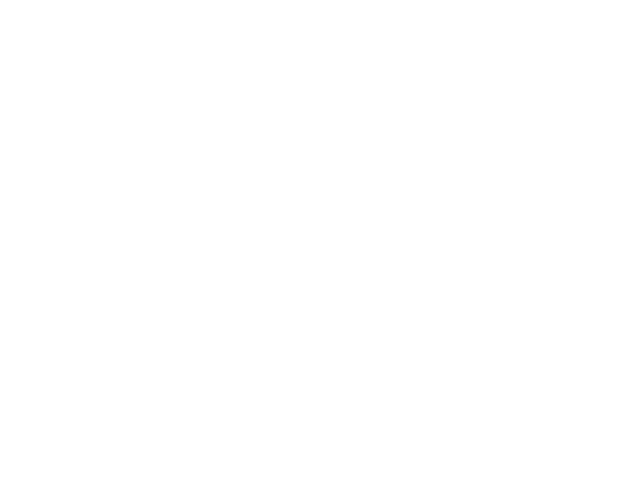

C:\Users\shebe\Anaconda3\lib\site-packages\astropy\table\column.py:929: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, oper)(other)


AttributeError: 'NoneType' object has no attribute 'set_ylabel'

In [3]:
###CUT: (z['e_ddo51']<0.3)
#Import modules
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack
from astropy.io import fits
import basic
%matplotlib nbagg

#Import list of exposures/CCDs
night = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\exposures.fits')

#Make subplots
fig, axes = plt.subplots(nrows=1, ncols=3)

#Subplot 1: g-DDO51 vs. g-i
#Pre-cut histogram
xedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gd_xedge.npy')
yedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gd_yedge.npy')
retm3 = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gd_counts.npy')
plt.subplot(1, 3, 1)
retm3[retm3==0]=1
plt.imshow(np.log(retm3.T),extent=[xedge.min(),xedge.max(),yedge.min(),yedge.max()],origin='lower',cmap='jet',aspect=1.2)
plt.ylabel('g-DDO51')
plt.xlabel('g-i')
plt.xlim(-1,3.3)
plt.ylim(-0.5,1)

#Post-cut scatterplot

#Blank fits table
col1 = fits.Column(name='g', format='D05', array=np.array([]))
col2 = fits.Column(name='i', format='D05', array=np.array([]))
col3 = fits.Column(name='ddo51', format='D05', array=np.array([]))
coldefs = fits.ColDefs([col1, col2,col3])
moff = fits.BinTableHDU.from_columns(coldefs)
temp = Table.read(moff)

for i in range(600):
    #Load data using basic.py
    chip = int(night['ccdn'][i])
    u = Table.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(night['night'][i][1:3],night['night'][i][0:7],night['night'][i][0:14]), path="{0}".format(chip))
    t = basic.Catalog.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(night['night'][i][1:3],night['night'][i][0:7],night['night'][i][0:14]), chips=chip)
    
    #Correct for extinction
    g_extinct = t.extinction_correct('g')
    i_extinct = t.extinction_correct('i')
    d_extinct = t.extinction_correct('ddo51')
    
    #CUT
    ind = np.where((u['e_ddo51']>0.3))
    u = u[ind]
    g_extinct = g_extinct[ind]
    i_extinct = i_extinct[ind]
    d_extinct = d_extinct[ind]

    #Remove nans
    ind = np.where((~np.isnan(g_extinct))&(~np.isnan(i_extinct))&(~np.isnan(d_extinct)))
    g_extinct = g_extinct[ind]
    i_extinct = i_extinct[ind]
    d_extinct = d_extinct[ind]
    u = u[ind]

    #Numpy arrays with de-reddened photometry
    g = np.array(g_extinct)
    i = np.array(i_extinct)
    d = np.array(d_extinct)
    
    #Temporary fits table to house photometry
    col1 = fits.Column(name='g', format='D05', array=np.zeros(len(u)))
    col2 = fits.Column(name='i', format='D05', array=np.zeros(len(u)))
    col3 = fits.Column(name='ddo51', format='D05', array=np.zeros(len(u)))
    coldefs = fits.ColDefs([col1, col2,col3])
    moff = fits.BinTableHDU.from_columns(coldefs)
    dat = Table.read(moff)
    
    #Insert reddening corrected photometry
    dat['g'] = g
    dat['i'] = i
    dat['ddo51'] = d

    temp = vstack([temp,dat])

x = temp['g'] - temp['i']
y = temp['g'] - temp['ddo51']
plt.scatter(x,y,s=4,c='m',marker='*')

#Subplot 2: g-z vs. g-i
#Pre-cut histogram
xedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gz_xedge.npy')
yedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gz_yedge.npy')
retm1 = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gz_counts.npy')
plt.subplot(1, 3, 2)
retm1[retm1==0]=1
plt.imshow(np.log(retm1.T),extent=[xedge.min(),xedge.max(),yedge.min(),yedge.max()],origin='lower',aspect=0.8)
plt.ylabel('g-z')
plt.xlabel('g-i')
plt.xlim(-1,3.3)
plt.ylim(-3.1,4)

#Post-cut scatterplot

#Blank fits table
col1 = fits.Column(name='g', format='D05', array=np.array([]))
col2 = fits.Column(name='i', format='D05', array=np.array([]))
col3 = fits.Column(name='z', format='D05', array=np.array([]))
coldefs = fits.ColDefs([col1, col2,col3])
moff = fits.BinTableHDU.from_columns(coldefs)
temp = Table.read(moff)

for i in range(600):
    #Load data using basic.py
    chip = int(night['ccdn'][i])
    u = Table.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(night['night'][i][1:3],night['night'][i][0:7],night['night'][i][0:14]), path="{0}".format(chip))
    t = basic.Catalog.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(night['night'][i][1:3],night['night'][i][0:7],night['night'][i][0:14]), chips=chip)
    
    #Correct for extinction
    g_extinct = t.extinction_correct('g')
    i_extinct = t.extinction_correct('i')
    z_extinct = t.extinction_correct('z')
    
    #CUT
    ind = np.where((u['e_ddo51']>0.3))
    u = u[ind]
    g_extinct = g_extinct[ind]
    i_extinct = i_extinct[ind]
    z_extinct = z_extinct[ind]

    #Remove nans
    ind = np.where((~np.isnan(g_extinct))&(~np.isnan(i_extinct))&(~np.isnan(z_extinct)))
    g_extinct = g_extinct[ind]
    i_extinct = i_extinct[ind]
    z_extinct = z_extinct[ind]
    u = u[ind]

    #Numpy arrays with de-reddened photometry
    g = np.array(g_extinct)
    i = np.array(i_extinct)
    z = np.array(z_extinct)
    
    #Temporary fits table to house photometry
    col1 = fits.Column(name='g', format='D05', array=np.zeros(len(u)))
    col2 = fits.Column(name='i', format='D05', array=np.zeros(len(u)))
    col3 = fits.Column(name='z', format='D05', array=np.zeros(len(u)))
    coldefs = fits.ColDefs([col1, col2,col3])
    moff = fits.BinTableHDU.from_columns(coldefs)
    dat = Table.read(moff)
    
    #Insert reddening corrected photometry
    dat['g'] = g
    dat['i'] = i
    dat['z'] = z

    temp = vstack([temp,dat])

x = temp['g'] - temp['i']
y = temp['g'] - temp['z']
plt.scatter(x,y,s=4,c='m',marker='*')

#Subplot 2: tpm vs. g
#Pre-cut histogram
xedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\g_tpm_xedge.npy')
yedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\g_tpm_yedge.npy')
retm = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\g_tpm_counts.npy')
plt.subplot(1, 3, 3)
retm[retm==0]=1
ax = plt.imshow(np.log(retm.T),extent=[xedge.min(),xedge.max(),yedge.min(),yedge.max()],origin='lower',cmap='jet',aspect=1.2)
plt.ylim(0,50)
plt.xlim(13,20)
plt.ylabel('tpm')
plt.xlabel('g')

#Post-cut scatterplot

#Blank fits table
col1 = fits.Column(name='g', format='D05', array=np.array([]))
col2 = fits.Column(name='tpm', format='D05', array=np.array([]))
coldefs = fits.ColDefs([col1, col2])
moff = fits.BinTableHDU.from_columns(coldefs)
temp = Table.read(moff)

for i in range(600):
    #Load data using basic.py
    chip = int(night['ccdn'][i])
    u = Table.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(night['night'][i][1:3],night['night'][i][0:7],night['night'][i][0:14]), path="{0}".format(chip))
    t = basic.Catalog.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(night['night'][i][1:3],night['night'][i][0:7],night['night'][i][0:14]), chips=chip)
    
    #Correct for extinction
    g_extinct = t.extinction_correct('g')
    
    #CUT
    ind = np.where((u['e_ddo51']>0.3))
    u = u[ind]
    g_extinct = g_extinct[ind]

    #Remove nans
    ind = np.where((~np.isnan(g_extinct))&(~np.isnan(u['pmra']))&(~np.isnan(u['pmde'])))
    g_extinct = g_extinct[ind]
    pmra = u['pmra'][ind]
    pmde = u['pmde'][ind]
    u = u[ind]
    
    #Total proper motion
    tpm = np.sqrt(pmra**2+pmde**2)

    #Numpy arrays with photometry and total proper motions
    g = np.array(g_extinct)
    tpm = np.array(tpm)
    
    #Temporary fits table to house photometry
    col1 = fits.Column(name='g', format='D05', array=np.zeros(len(u)))
    col2 = fits.Column(name='tpm', format='D05', array=np.zeros(len(u)))
    coldefs = fits.ColDefs([col1, col2])
    moff = fits.BinTableHDU.from_columns(coldefs)
    dat = Table.read(moff)
    
    #Insert reddening corrected photometry
    dat['g'] = g
    dat['tpm'] = tpm

    temp = vstack([temp,dat])

x = temp['g']
y = temp['tpm']
plt.scatter(x,y,s=4,c='m',marker='*')

#Colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(ax, cax=cbar_ax)
cbar_ax.set_ylabel('log(counts)', rotation=270, labelpad=+16)

#Figure Title
fig.suptitle('Stars Removed with high DDO51 Errors', fontsize=16)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.8)
plt.show()

<IPython.core.display.Javascript object>


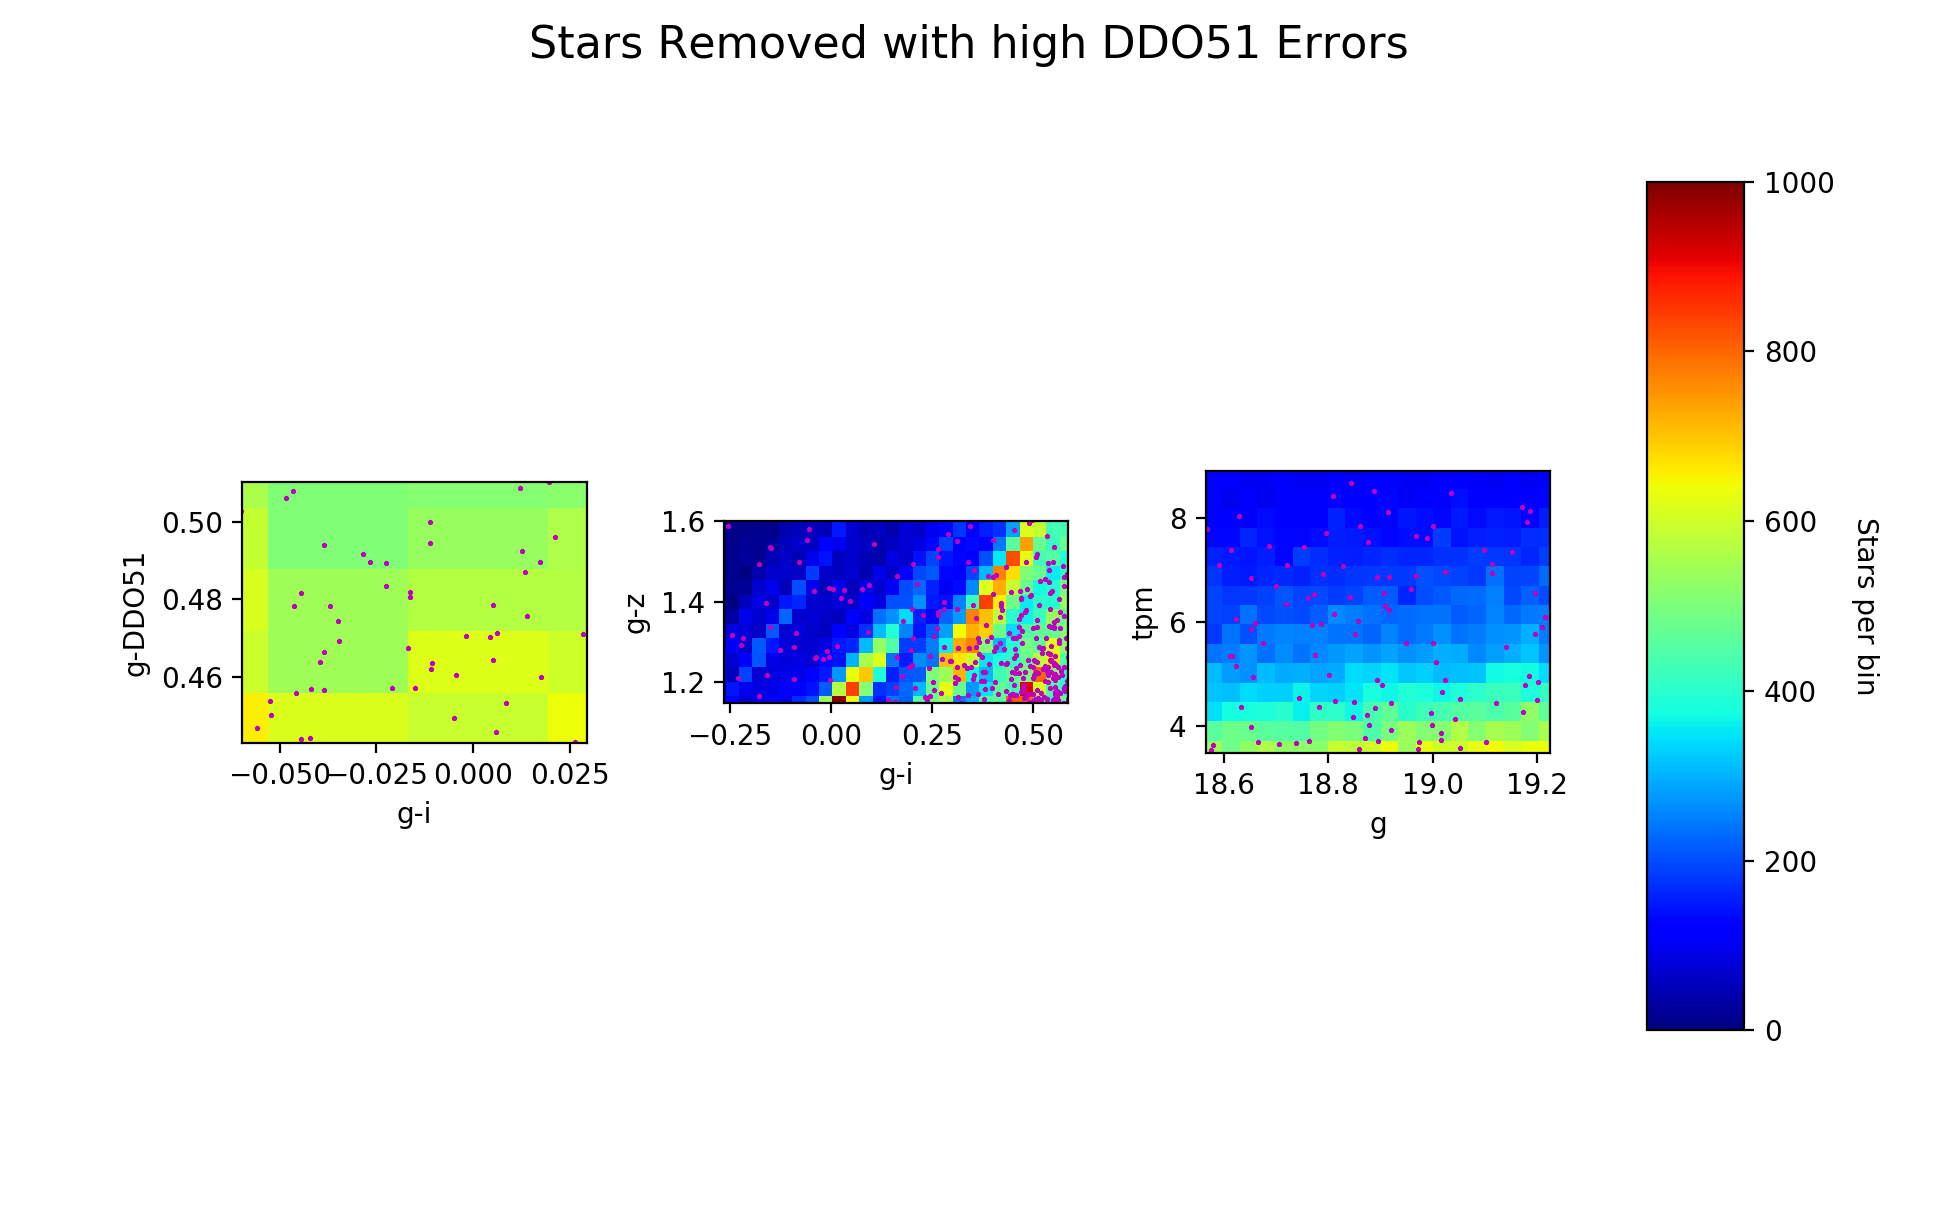

C:\Users\shebe\Anaconda3\lib\site-packages\astropy\table\column.py:929: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, oper)(other)
C:\Users\shebe\Anaconda3\lib\site-packages\astropy\table\column.py:929: RuntimeWarning: invalid value encountered in less_equal
  return getattr(self.data, oper)(other)
C:\Users\shebe\Anaconda3\lib\site-packages\astropy\table\column.py:929: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, oper)(other)
C:\Users\shebe\Anaconda3\lib\site-packages\astropy\table\column.py:929: RuntimeWarning: invalid value encountered in greater_equal
  return getattr(self.data, oper)(other)


In [20]:
###CUT: (z['e_ddo51']<0.3)
#Import modules
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack
from astropy.io import fits
import basic
%matplotlib nbagg

#Import list of exposures/CCDs
night = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\exposures.fits')

#Make subplots
fig, axes = plt.subplots(nrows=1, ncols=3)

#Subplot 1: g-DDO51 vs. g-i
#Pre-cut histogram
xedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gd_xedge.npy')
yedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gd_yedge.npy')
retm3 = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gd_counts.npy')
plt.subplot(1, 3, 1)
plt.imshow(retm3.T,extent=[xedge.min(),xedge.max(),yedge.min(),yedge.max()],origin='lower',cmap='jet',vmin=0, vmax=1000)
plt.ylabel('g-DDO51')
plt.xlabel('g-i')
plt.xlim(-3,4.4)
plt.ylim(-1,2.2)

#Post-cut scatterplot

#Blank fits table
col1 = fits.Column(name='g', format='D05', array=np.array([]))
col2 = fits.Column(name='i', format='D05', array=np.array([]))
col3 = fits.Column(name='ddo51', format='D05', array=np.array([]))
coldefs = fits.ColDefs([col1, col2,col3])
moff = fits.BinTableHDU.from_columns(coldefs)
temp = Table.read(moff)

for i in range(600):
    #Load data using basic.py
    chip = int(night['ccdn'][i])
    u = Table.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(night['night'][i][1:3],night['night'][i][0:7],night['night'][i][0:14]), path="{0}".format(chip))
    t = basic.Catalog.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(night['night'][i][1:3],night['night'][i][0:7],night['night'][i][0:14]), chips=chip)
    
    #Correct for extinction
    g_extinct = t.extinction_correct('g')
    i_extinct = t.extinction_correct('i')
    d_extinct = t.extinction_correct('ddo51')
    
    #CUT
    ind = np.where(~((((u['astrometric_excess_noise']<3.1622)&(u['phot_g_mean_mag']<=19)|(u['phot_g_mean_mag']>19))&
               ((u['astrometric_excess_noise']<(3.1622 + (10**1.25-10**0.5)/4*(u['phot_g_mean_mag']-19)))&
               (u['phot_g_mean_mag']>=19)|(u['phot_g_mean_mag']<19)))))
    u = u[ind]
    g_extinct = g_extinct[ind]
    i_extinct = i_extinct[ind]
    d_extinct = d_extinct[ind]

    #Remove nans
    ind = np.where((~np.isnan(g_extinct))&(~np.isnan(i_extinct))&(~np.isnan(d_extinct)))
    g_extinct = g_extinct[ind]
    i_extinct = i_extinct[ind]
    d_extinct = d_extinct[ind]
    u = u[ind]

    #Numpy arrays with de-reddened photometry
    g = np.array(g_extinct)
    i = np.array(i_extinct)
    d = np.array(d_extinct)
    
    #Temporary fits table to house photometry
    col1 = fits.Column(name='g', format='D05', array=np.zeros(len(u)))
    col2 = fits.Column(name='i', format='D05', array=np.zeros(len(u)))
    col3 = fits.Column(name='ddo51', format='D05', array=np.zeros(len(u)))
    coldefs = fits.ColDefs([col1, col2,col3])
    moff = fits.BinTableHDU.from_columns(coldefs)
    dat = Table.read(moff)
    
    #Insert reddening corrected photometry
    dat['g'] = g
    dat['i'] = i
    dat['ddo51'] = d

    temp = vstack([temp,dat])

x = temp['g'] - temp['i']
y = temp['g'] - temp['ddo51']
plt.scatter(x,y,s=1,c='m',marker='*')

#Subplot 2: g-z vs. g-i
#Pre-cut histogram
xedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gz_xedge.npy')
yedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gz_yedge.npy')
retm1 = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gz_counts.npy')
plt.subplot(1, 3, 2)
plt.imshow(retm1.T,extent=[xedge.min(),xedge.max(),yedge.min(),yedge.max()],origin='lower',cmap='jet',vmin=0, vmax=1000)
plt.ylabel('g-z')
plt.xlabel('g-i')
plt.xlim(-3.3,3.1)
plt.ylim(-3.1,4)

#Post-cut scatterplot

#Blank fits table
col1 = fits.Column(name='g', format='D05', array=np.array([]))
col2 = fits.Column(name='i', format='D05', array=np.array([]))
col3 = fits.Column(name='z', format='D05', array=np.array([]))
coldefs = fits.ColDefs([col1, col2,col3])
moff = fits.BinTableHDU.from_columns(coldefs)
temp = Table.read(moff)

for i in range(600):
    #Load data using basic.py
    chip = int(night['ccdn'][i])
    u = Table.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(night['night'][i][1:3],night['night'][i][0:7],night['night'][i][0:14]), path="{0}".format(chip))
    t = basic.Catalog.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(night['night'][i][1:3],night['night'][i][0:7],night['night'][i][0:14]), chips=chip)
    
    #Correct for extinction
    g_extinct = t.extinction_correct('g')
    i_extinct = t.extinction_correct('i')
    z_extinct = t.extinction_correct('z')
    
    #CUT
    ind = np.where(~((((u['astrometric_excess_noise']<3.1622)&(u['phot_g_mean_mag']<=19)|(u['phot_g_mean_mag']>19))&
               ((u['astrometric_excess_noise']<(3.1622 + (10**1.25-10**0.5)/4*(u['phot_g_mean_mag']-19)))&
               (u['phot_g_mean_mag']>=19)|(u['phot_g_mean_mag']<19)))))
    u = u[ind]
    g_extinct = g_extinct[ind]
    i_extinct = i_extinct[ind]
    z_extinct = z_extinct[ind]

    #Remove nans
    ind = np.where((~np.isnan(g_extinct))&(~np.isnan(i_extinct))&(~np.isnan(z_extinct)))
    g_extinct = g_extinct[ind]
    i_extinct = i_extinct[ind]
    z_extinct = z_extinct[ind]
    u = u[ind]

    #Numpy arrays with de-reddened photometry
    g = np.array(g_extinct)
    i = np.array(i_extinct)
    z = np.array(z_extinct)
    
    #Temporary fits table to house photometry
    col1 = fits.Column(name='g', format='D05', array=np.zeros(len(u)))
    col2 = fits.Column(name='i', format='D05', array=np.zeros(len(u)))
    col3 = fits.Column(name='z', format='D05', array=np.zeros(len(u)))
    coldefs = fits.ColDefs([col1, col2,col3])
    moff = fits.BinTableHDU.from_columns(coldefs)
    dat = Table.read(moff)
    
    #Insert reddening corrected photometry
    dat['g'] = g
    dat['i'] = i
    dat['z'] = z

    temp = vstack([temp,dat])

x = temp['g'] - temp['i']
y = temp['g'] - temp['z']
plt.scatter(x,y,s=1,c='m',marker='*')

#Subplot 2: tpm vs. g
#Pre-cut histogram
xedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\g_tpm_xedge.npy')
yedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\g_tpm_yedge.npy')
retm = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\g_tpm_counts.npy')
plt.subplot(1, 3, 3)
ax = plt.imshow(retm.T,extent=[xedge.min(),xedge.max(),yedge.min(),yedge.max()],origin='lower',cmap='jet',aspect=0.10,vmin=0, vmax=1000)
plt.ylim(0,50)
plt.xlim(13,20)
plt.ylabel('tpm')
plt.xlabel('g')

#Post-cut scatterplot

#Blank fits table
col1 = fits.Column(name='g', format='D05', array=np.array([]))
col2 = fits.Column(name='tpm', format='D05', array=np.array([]))
coldefs = fits.ColDefs([col1, col2])
moff = fits.BinTableHDU.from_columns(coldefs)
temp = Table.read(moff)

for i in range(600):
    #Load data using basic.py
    chip = int(night['ccdn'][i])
    u = Table.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(night['night'][i][1:3],night['night'][i][0:7],night['night'][i][0:14]), path="{0}".format(chip))
    t = basic.Catalog.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(night['night'][i][1:3],night['night'][i][0:7],night['night'][i][0:14]), chips=chip)
    
    #Correct for extinction
    g_extinct = t.extinction_correct('g')
    
    #CUT
    ind = np.where(~((((u['astrometric_excess_noise']<3.1622)&(u['phot_g_mean_mag']<=19)|(u['phot_g_mean_mag']>19))&
               ((u['astrometric_excess_noise']<(3.1622 + (10**1.25-10**0.5)/4*(u['phot_g_mean_mag']-19)))&
               (u['phot_g_mean_mag']>=19)|(u['phot_g_mean_mag']<19)))))
    u = u[ind]
    g_extinct = g_extinct[ind]

    #Remove nans
    ind = np.where((~np.isnan(g_extinct))&(~np.isnan(u['pmra']))&(~np.isnan(u['pmde'])))
    g_extinct = g_extinct[ind]
    pmra = u['pmra'][ind]
    pmde = u['pmde'][ind]
    u = u[ind]
    
    #Total proper motion
    tpm = np.sqrt(pmra**2+pmde**2)

    #Numpy arrays with photometry and total proper motions
    g = np.array(g_extinct)
    tpm = np.array(tpm)
    
    #Temporary fits table to house photometry
    col1 = fits.Column(name='g', format='D05', array=np.zeros(len(u)))
    col2 = fits.Column(name='tpm', format='D05', array=np.zeros(len(u)))
    coldefs = fits.ColDefs([col1, col2])
    moff = fits.BinTableHDU.from_columns(coldefs)
    dat = Table.read(moff)
    
    #Insert reddening corrected photometry
    dat['g'] = g
    dat['tpm'] = tpm

    temp = vstack([temp,dat])

x = temp['g']
y = temp['tpm']
plt.scatter(x,y,s=1,c='m',marker='*')

#Colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(ax, cax=cbar_ax)
cbar_ax.set_ylabel('Stars per bin', rotation=270, labelpad=+16)

#Figure Title
fig.suptitle('Stars Removed with high DDO51 Errors', fontsize=16)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.8)
plt.show()

In [11]:
ind

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([   0,    2,    3, ..., 7497, 7498, 7501], dtype=int64))

In [18]:
ind = np.where(((((u['astrometric_excess_noise']<3.1622)&(u['phot_g_mean_mag']<=19)|(u['phot_g_mean_mag']>19))&
               ((u['astrometric_excess_noise']<(3.1622 + (10**1.25-10**0.5)/4*(u['phot_g_mean_mag']-19)))&
               (u['phot_g_mean_mag']>=19)|(u['phot_g_mean_mag']<19)))))
ind

(array([], dtype=int64),)

In [15]:
###Subplot function
def diag(crite, title):
    #Import modules
    import matplotlib.pyplot as plt
    import numpy as np
    from astropy.table import Table, vstack
    from astropy.io import fits
    import basic
    %matplotlib nbagg

    #Import list of exposures/CCDs
    night = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\exposures.fits')

    #Make subplots
    fig, axes = plt.subplots(nrows=1, ncols=3)

    #Subplot 1: g-DDO51 vs. g-i
    #Pre-cut histogram
    xedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gd_xedge.npy')
    yedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gd_yedge.npy')
    retm3 = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gd_counts.npy')
    plt.subplot(1, 3, 1)
    retm3[retm3==0]=1
    plt.imshow(np.log(retm3.T),extent=[xedge.min(),xedge.max(),yedge.min(),yedge.max()],origin='lower',cmap='jet', aspect="auto")
    plt.ylabel('g-DDO51')
    plt.xlabel('g-i')
    plt.xlim(-1,3.3)
    plt.ylim(-0.5,0.93)

    #Post-cut scatterplot

    #Blank fits table
    col1 = fits.Column(name='g', format='D05', array=np.array([]))
    col2 = fits.Column(name='i', format='D05', array=np.array([]))
    col3 = fits.Column(name='ddo51', format='D05', array=np.array([]))
    coldefs = fits.ColDefs([col1, col2,col3])
    moff = fits.BinTableHDU.from_columns(coldefs)
    temp = Table.read(moff)

    for i in range(600):
        #Load data using basic.py
        chip = int(night['ccdn'][i])
        u = Table.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(night['night'][i][1:3],night['night'][i][0:7],night['night'][i][0:14]), path="{0}".format(chip))
        t = basic.Catalog.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(night['night'][i][1:3],night['night'][i][0:7],night['night'][i][0:14]), chips=chip)

        #Correct for extinction
        g_extinct = t.extinction_correct('g')
        i_extinct = t.extinction_correct('i')
        d_extinct = t.extinction_correct('ddo51')

        #CUT
        ind = np.where(crite)
        u = u[ind]
        g_extinct = g_extinct[ind]
        i_extinct = i_extinct[ind]
        d_extinct = d_extinct[ind]

        #Remove nans
        ind = np.where((~np.isnan(g_extinct))&(~np.isnan(i_extinct))&(~np.isnan(d_extinct)))
        g_extinct = g_extinct[ind]
        i_extinct = i_extinct[ind]
        d_extinct = d_extinct[ind]
        u = u[ind]

        #Numpy arrays with de-reddened photometry
        g = np.array(g_extinct)
        i = np.array(i_extinct)
        d = np.array(d_extinct)

        #Temporary fits table to house photometry
        col1 = fits.Column(name='g', format='D05', array=np.zeros(len(u)))
        col2 = fits.Column(name='i', format='D05', array=np.zeros(len(u)))
        col3 = fits.Column(name='ddo51', format='D05', array=np.zeros(len(u)))
        coldefs = fits.ColDefs([col1, col2,col3])
        moff = fits.BinTableHDU.from_columns(coldefs)
        dat = Table.read(moff)

        #Insert reddening corrected photometry
        dat['g'] = g
        dat['i'] = i
        dat['ddo51'] = d

        temp = vstack([temp,dat])

    x = temp['g'] - temp['i']
    y = temp['g'] - temp['ddo51']
    plt.scatter(x,y,s=4,c='m',marker='*')

    #Subplot 2: g-z vs. g-i
    #Pre-cut histogram
    xedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gz_xedge.npy')
    yedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gz_yedge.npy')
    retm1 = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gz_counts.npy')
    plt.subplot(1, 3, 2)
    retm1[retm1==0]=1
    plt.imshow(np.log(retm1.T),extent=[xedge.min(),xedge.max(),yedge.min(),yedge.max()],origin='lower', aspect="auto")
    plt.ylabel('g-z')
    plt.xlabel('g-i')
    plt.xlim(-1,2.7)
    plt.ylim(-2.3,3.6)

    #Post-cut scatterplot

    #Blank fits table
    col1 = fits.Column(name='g', format='D05', array=np.array([]))
    col2 = fits.Column(name='i', format='D05', array=np.array([]))
    col3 = fits.Column(name='z', format='D05', array=np.array([]))
    coldefs = fits.ColDefs([col1, col2,col3])
    moff = fits.BinTableHDU.from_columns(coldefs)
    temp = Table.read(moff)

    for i in range(600):
        #Load data using basic.py
        chip = int(night['ccdn'][i])
        u = Table.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(night['night'][i][1:3],night['night'][i][0:7],night['night'][i][0:14]), path="{0}".format(chip))
        t = basic.Catalog.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(night['night'][i][1:3],night['night'][i][0:7],night['night'][i][0:14]), chips=chip)

        #Correct for extinction
        g_extinct = t.extinction_correct('g')
        i_extinct = t.extinction_correct('i')
        z_extinct = t.extinction_correct('z')

        #CUT
        ind = np.where(crite)
        u = u[ind]
        g_extinct = g_extinct[ind]
        i_extinct = i_extinct[ind]
        z_extinct = z_extinct[ind]

        #Remove nans
        ind = np.where((~np.isnan(g_extinct))&(~np.isnan(i_extinct))&(~np.isnan(z_extinct)))
        g_extinct = g_extinct[ind]
        i_extinct = i_extinct[ind]
        z_extinct = z_extinct[ind]
        u = u[ind]

        #Numpy arrays with de-reddened photometry
        g = np.array(g_extinct)
        i = np.array(i_extinct)
        z = np.array(z_extinct)

        #Temporary fits table to house photometry
        col1 = fits.Column(name='g', format='D05', array=np.zeros(len(u)))
        col2 = fits.Column(name='i', format='D05', array=np.zeros(len(u)))
        col3 = fits.Column(name='z', format='D05', array=np.zeros(len(u)))
        coldefs = fits.ColDefs([col1, col2,col3])
        moff = fits.BinTableHDU.from_columns(coldefs)
        dat = Table.read(moff)

        #Insert reddening corrected photometry
        dat['g'] = g
        dat['i'] = i
        dat['z'] = z

        temp = vstack([temp,dat])

    x = temp['g'] - temp['i']
    y = temp['g'] - temp['z']
    plt.scatter(x,y,s=4,c='m',marker='*')

    #Subplot 3: tpm vs. g
    #Pre-cut histogram
    xedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\g_tpm_xedge.npy')
    yedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\g_tpm_yedge.npy')
    retm = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\g_tpm_counts.npy')
    plt.subplot(1, 3, 3)
    retm[retm==0]=1
    ax = plt.imshow(np.log(retm.T),extent=[xedge.min(),xedge.max(),yedge.min(),yedge.max()],origin='lower',cmap='jet', aspect="auto")
    plt.ylim(0,50)
    plt.xlim(14.3,20)
    plt.ylabel('tpm')
    plt.xlabel('g')

    #Post-cut scatterplot

    #Blank fits table
    col1 = fits.Column(name='g', format='D05', array=np.array([]))
    col2 = fits.Column(name='tpm', format='D05', array=np.array([]))
    coldefs = fits.ColDefs([col1, col2])
    moff = fits.BinTableHDU.from_columns(coldefs)
    temp = Table.read(moff)

    for i in range(600):
        #Load data using basic.py
        chip = int(night['ccdn'][i])
        u = Table.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(night['night'][i][1:3],night['night'][i][0:7],night['night'][i][0:14]), path="{0}".format(chip))
        t = basic.Catalog.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(night['night'][i][1:3],night['night'][i][0:7],night['night'][i][0:14]), chips=chip)

        #Correct for extinction
        g_extinct = t.extinction_correct('g')

        #CUT
        ind = np.where(crite)
        u = u[ind]
        g_extinct = g_extinct[ind]

        #Remove nans
        ind = np.where((~np.isnan(g_extinct))&(~np.isnan(u['pmra']))&(~np.isnan(u['pmde'])))
        g_extinct = g_extinct[ind]
        pmra = u['pmra'][ind]
        pmde = u['pmde'][ind]
        u = u[ind]

        #Total proper motion
        tpm = np.sqrt(pmra**2+pmde**2)

        #Numpy arrays with photometry and total proper motions
        g = np.array(g_extinct)
        tpm = np.array(tpm)

        #Temporary fits table to house photometry
        col1 = fits.Column(name='g', format='D05', array=np.zeros(len(u)))
        col2 = fits.Column(name='tpm', format='D05', array=np.zeros(len(u)))
        coldefs = fits.ColDefs([col1, col2])
        moff = fits.BinTableHDU.from_columns(coldefs)
        dat = Table.read(moff)

        #Insert reddening corrected photometry
        dat['g'] = g
        dat['tpm'] = tpm

        temp = vstack([temp,dat])

    x = temp['g']
    y = temp['tpm']
    plt.scatter(x,y,s=4,c='m',marker='*')

    #Colorbar
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    fig.colorbar(ax, cax=cbar_ax)
    cbar_ax.set_ylabel('log(counts)', rotation=270, labelpad=+16)

    #Figure Title
    fig.suptitle(title, fontsize=16)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.8)
    plt.show()

<IPython.core.display.Javascript object>


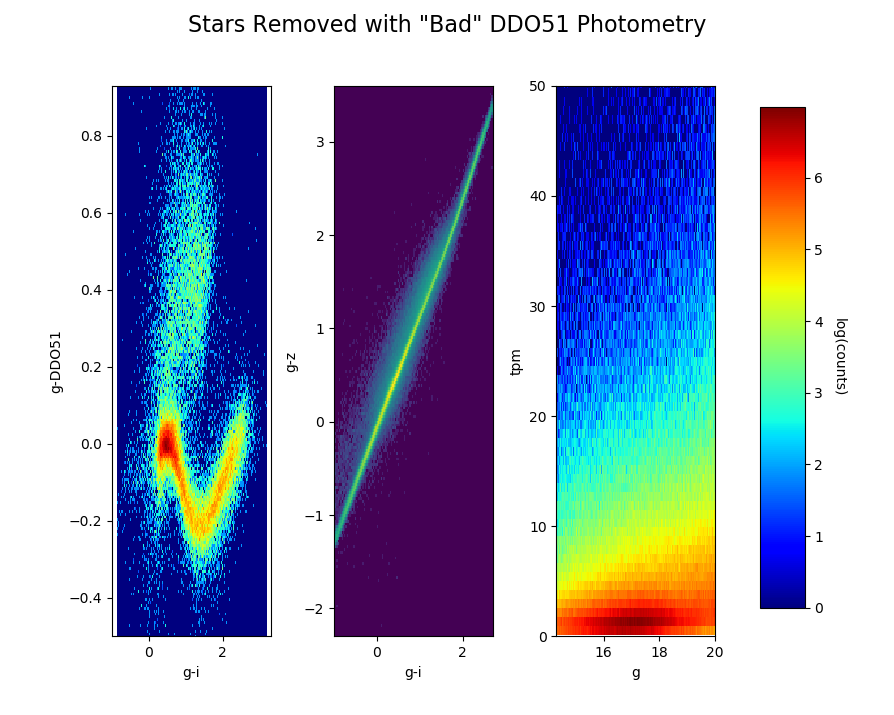

In [16]:
diag(u['e_ddo51']>0.3,'Stars Removed with "Bad" DDO51 Photometry')